## Prerequisite Code

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

If the 'clothing_revs.csv' file is in your Google Drive, run the code cell below to mount your Google Drive for use.



---



## Questions:

1. (a) (1) Use the 'clothing_revs.csv' file to create a data frame named reviews. View the first 5 observations in the review data frame.


In [ ]:
reviews = pd.read_csv('clothing_revs.csv')
reviews.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


1. (b) (1) View the dataframe information, to evaluate variable types and missingness. If there are any missing values in the Review_Text column, remove the observation(s) from the dataframe row-wise.

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              5000 non-null   int64 
 1   Age                      5000 non-null   int64 
 2   Title                    4159 non-null   object
 3   Review Text              4821 non-null   object
 4   Rating                   5000 non-null   int64 
 5   Recommended IND          5000 non-null   int64 
 6   Positive Feedback Count  5000 non-null   int64 
 7   Division Name            5000 non-null   object
 8   Department Name          5000 non-null   object
 9   Class Name               5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [ ]:
reviews = reviews.dropna(subset=['Review Text'])
print(f"Number of missing values: {missing_count}")

Number of missing values: 0


1. (c) (1) The Rating variable takes on values from 1-5. Create a column named sentiment that converts rating values of 1-3 to 0 and 4-5 to 1. Then, plot the sentiment variable to view the distribution of negative and positive reviews.

<Axes: >

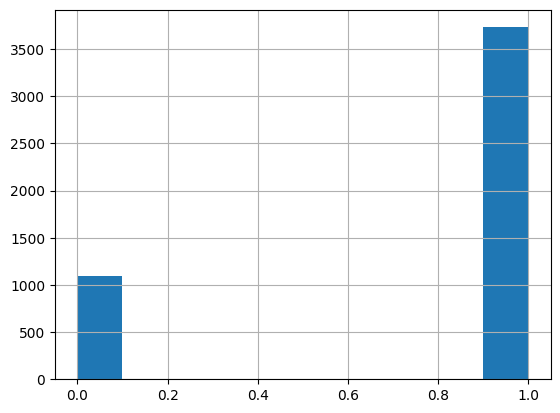

In [ ]:
reviews['sentiment'] = reviews['Rating'].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})
reviews.sentiment.hist()

<hr>
<br>

2. (2) Create the train and test sets. Split the data using a 75/25 split ratio and initialize a random seed (`random_state`) of 321 for reproducibility.

In [ ]:
X = reviews['Review Text']
y = reviews['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

<hr>
<br>

3. (a) (5) Define and build a pipeline for classification analysis to predict the rating sentiment.  Use the following methods in your analysis: Complement Naive Bayes, Logistic Regression, Support Vector Machines, Decision Tree, AdaBoost, Random Forest, and Multilayer Perceptron (MLP/ANN).

The pipeline should do the following on the training data for each classification model:

-preprocess and tokenize the review text, removing stop words and setting the minimum document frequency to 5 (`min_df = 5`)

-transform the tokenized text into a TF-IDF-weighted Document Term Matrix

-train the classifcation model

Obtain and print performance information for each model.

In [ ]:
names = ["Complement Naive Bayes", "Logistic Regression", "SVM", "Decision Tree", "AdaBoost", "Random Forest", "Multiplelayer Perceptron"]

# Define the correponding list of classifiers, set parameters where needed

classifiers = [ComplementNB(), LogisticRegression(),
               SVC(probability=True),
               DecisionTreeClassifier(max_depth=5),
               AdaBoostClassifier(),
               RandomForestClassifier(max_depth=5, n_estimators=10),
               MLPClassifier(alpha=1, max_iter=1000),
               ]

# Iterate through the list of models
# Execute the pipeline (TFIDF Vectorizer + model) for each
# Calculate the print out the metrics for each model

for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),
                    ('classifier', clf),
                    ])

  clf_pipe.fit(X_train,y_train)

  pred = clf_pipe.predict(X_test)
  pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  print('\n\n', name, '\n\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')



 Complement Naive Bayes 


              precision    recall  f1-score   support

           0       0.64      0.79      0.70       280
           1       0.93      0.86      0.90       926

    accuracy                           0.85      1206
   macro avg       0.78      0.82      0.80      1206
weighted avg       0.86      0.85      0.85      1206

ROC AUC:  0.9164609688367789
Precision/Recall AUC:  0.18149299878293668





 Logistic Regression 


              precision    recall  f1-score   support

           0       0.88      0.42      0.57       280
           1       0.85      0.98      0.91       926

    accuracy                           0.85      1206
   macro avg       0.86      0.70      0.74      1206
weighted avg       0.86      0.85      0.83      1206

ROC AUC:  0.9243636223387843
Precision/Recall AUC:  0.15480765332886917





 SVM 


              precision    recall  f1-score   support

           0       0.84      0.48      0.61       280
           1       0.8

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(




 AdaBoost 


              precision    recall  f1-score   support

           0       0.69      0.50      0.58       280
           1       0.86      0.93      0.90       926

    accuracy                           0.83      1206
   macro avg       0.78      0.72      0.74      1206
weighted avg       0.82      0.83      0.82      1206

ROC AUC:  0.8587627275532244
Precision/Recall AUC:  0.15444579869354205





 Random Forest 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.77      1.00      0.87       926

    accuracy                           0.77      1206
   macro avg       0.38      0.50      0.43      1206
weighted avg       0.59      0.77      0.67      1206

ROC AUC:  0.7856448626966985
Precision/Recall AUC:  0.11608623548922059





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




 Multiplelayer Perceptron 


              precision    recall  f1-score   support

           0       0.90      0.24      0.37       280
           1       0.81      0.99      0.89       926

    accuracy                           0.82      1206
   macro avg       0.86      0.61      0.63      1206
weighted avg       0.83      0.82      0.77      1206

ROC AUC:  0.9210043196544277
Precision/Recall AUC:  0.13685538819999885





3. (b) (2.5) Based on your output and the business case, which model should Macy's use to predict customer sentiment? Why? Explain.

Based on our model output's it looks like the best model that we can use is SVM. When we check the metrics it has better for ROC compared to Logistic Regreggsion and others. Also the F-1 score is better for predicting negative reviews. If we compare the all metrics SVM performed better.



---

<br>

4. (a) (5) Many classification models (Decision Trees, Random Forest, Logistic Regression, Support Vector Machines) can accept class weights, which can be used to correct for class imbalance when training classification models. Balanced class weights assign a weight to each class level of the target variable that is inversely proportional to the class frequencies. Assuming your target variable in your training data is named y_train, balanced class weights will assign weights using the following formula: `len(y_train)/(len(np.unique(y_train)) * np.bincount(y_train))`.
Create another pipeline, this time including the argument `class_weight = 'balanced'` for the models that allow class weights.

The pipeline should do the following on the training data for each classification model:

-preprocess and tokenize the review text, removing stop words and setting the minimum document frequency to 5 (`min_df = 5`)

-transform the tokenized text into a TF-IDF-weighted Document Term Matrix

-train the classifcation model

Obtain and print performance information for each model.

In [ ]:
import numpy as np

# Calculate balanced class weights explicitly based on the provided formula
class_weights = len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))
print(f"Calculated Class Weights: {class_weights}")

# List the models that support class weights
names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"]

# Define the corresponding list of classifiers with class weights
classifiers = [LogisticRegression(class_weight='balanced'),
               SVC(probability=True, class_weight='balanced'),
               DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
               RandomForestClassifier(max_depth=5, n_estimators=10, class_weight='balanced')]

# Iterate through the list of models
# Execute the pipeline (TFIDF Vectorizer + model) for each
# Calculate and print out the metrics for each model

for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),
                    ('classifier', clf),
                    ])

  clf_pipe.fit(X_train,y_train)

  pred = clf_pipe.predict(X_test)
  pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  print('\n\n', name, '\n\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')

Calculated Class Weights: [2.22872996 0.64461484]


 Logistic Regression 


              precision    recall  f1-score   support

           0       0.63      0.82      0.72       280
           1       0.94      0.85      0.90       926

    accuracy                           0.85      1206
   macro avg       0.79      0.84      0.81      1206
weighted avg       0.87      0.85      0.85      1206

ROC AUC:  0.9241746374575748
Precision/Recall AUC:  0.18608178509898315





 SVM 


              precision    recall  f1-score   support

           0       0.71      0.70      0.71       280
           1       0.91      0.92      0.91       926

    accuracy                           0.86      1206
   macro avg       0.81      0.81      0.81      1206
weighted avg       0.86      0.86      0.86      1206

ROC AUC:  0.9251079913606912
Precision/Recall AUC:  0.17684216591558793





 Decision Tree 


              precision    recall  f1-score   support

           0       0.37      0.68  

4. (b) (2.5) Based on your output and the business case, which model should Macy's use to predict customer sentiment? Why? Is this the same model you recommended in 3(b)? Explain.

In this allowed class weights models again SVM performed better than all other models and it even performed better than first output we had in the question #3. And yes we again recommending the same model that we recommended in the question #3(b).


<hr>